## Calculating Overlap between samples

# Step 1: Load the required packages for this notebook ! 
Keep code as written below and run. All places where changes are needed are indicated as Steps throughout this notebook.

In [2]:
%%capture
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.html.widgets import interact

try:
    import pyclonal
except ImportError:
    pyclonal_path = os.path.abspath(os.path.join('..'))
    if pyclonal_path not in sys.path:
        sys.path.append(pyclonal_path)

from pyclonal.io import combineFiles
from pyclonal.utils import distance

# Step 2 : Change directory to your data location

The directory field is for the directory the folder is located where all your files are. This part is required. The pattern field is an optional field, if you do not want to load all the files in a given directory, you can instead specify a pattern for those files that you do want to load in

In [3]:
#combine input files
directory = "../sample_input_files/changeo"
pattern = "D*.changeo_small_demo.tsv" #pattern paremeter is optional

df, seq_df = combineFiles(directory,pattern)

../sample_input_files/changeo/D287.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/changeo/D233.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/changeo/D280.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/changeo/D255.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/changeo/D299.changeo_small_demo.tsv looks like a changeo file


# Step 3 : Change directory to your metadata location

You need to create a metadata file before running this part of the notebook. Here is where you load that metadata file that you created that described your samples. 

In [27]:
directory = '../sample_input_files/metadata_demo.csv'

metadata=pd.read_csv(directory,index_col='filename')

# Step 4: Specify which sample group you want to look at first

In this case it is the patient that we are specifying

In [28]:
patient = 'D233'

In [29]:
cosine_dist = distance(df, metadata, field='patient_id', value=patient)
cosine_dist

,D233_2,D233_1,D233_3,D233_4,D233_5,D233_6,D233_7,D233_8
D233_1,0.004087,1.000000,0.017830,0.027962,0.053850,0.049842,0.026447,0.026842
D233_2,1.000000,0.004087,0.016537,0.012107,0.009240,0.031582,0.004877,0.008931
D233_3,0.016537,0.017830,1.000000,0.016389,0.063183,0.020798,0.020140,0.019412
D233_4,0.012107,0.027962,0.016389,1.000000,0.039000,0.039225,0.023213,0.143629
D233_5,0.009240,0.053850,0.063183,0.039000,1.000000,0.185147,0.029468,0.102882
D233_6,0.031582,0.049842,0.020798,0.039225,0.185147,1.000000,0.013390,0.065064
D233_7,0.004877,0.026447,0.020140,0.023213,0.029468,0.013390,1.000000,0.007086
D233_8,0.008931,0.026842,0.019412,0.143629,0.102882,0.065064,0.007086,1.000000


In [30]:
jaccard_dist = distance(df, metadata, field='patient_id', value=patient, method='jaccard')
jaccard_dist

,D233_2,D233_1,D233_3,D233_4,D233_5,D233_6,D233_7,D233_8
D233_1,1.000000,1.000000,0.973958,0.989418,0.983425,0.989899,0.979592,0.989848
D233_2,1.000000,1.000000,0.990148,0.984375,0.989418,0.979899,0.985366,0.995025
D233_3,0.990148,0.973958,1.000000,0.970930,0.975309,0.989189,0.965909,0.988889
D233_4,0.984375,0.989418,0.970930,1.000000,0.993902,0.982456,0.965714,0.982759
D233_5,0.989418,0.983425,0.975309,0.993902,1.000000,0.970060,0.994048,0.974026
D233_6,0.979899,0.989899,0.989189,0.982456,0.970060,1.000000,0.984043,0.966292
D233_7,0.985366,0.979592,0.965909,0.965714,0.994048,0.984043,1.000000,0.977901
D233_8,0.995025,0.989848,0.988889,0.982759,0.974026,0.966292,0.977901,1.000000


# Step 5: Make interactive plot

In [31]:
def plot_heatmap(method):
    METRIC = method
    if METRIC == 'cosine':
        data = cosine_dist
    if METRIC=='jaccard':
        data = jaccard_dist
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.clustermap(data=data,cmap=cmap)

In [32]:
interact(plot_heatmap, method=['jaccard', 'cosine'])

interactive(children=(Dropdown(description='method', options=('jaccard', 'cosine'), value='jaccard'), Output()…

<function __main__.plot_heatmap(method)>

Show sample of a plot that is not interactive

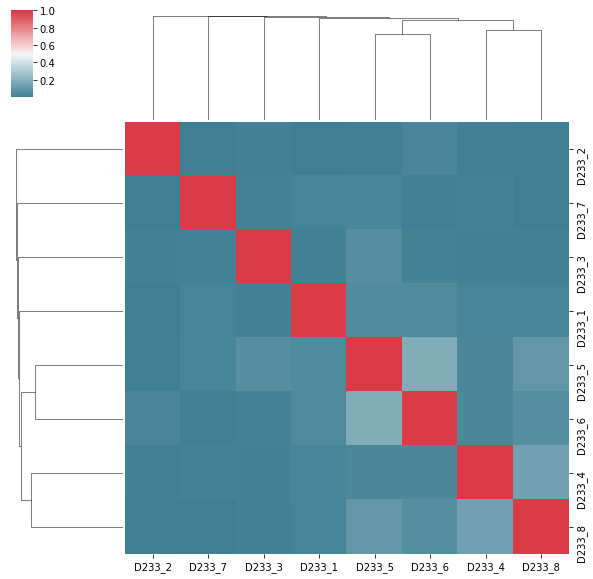

In [33]:
plot_heatmap('cosine')

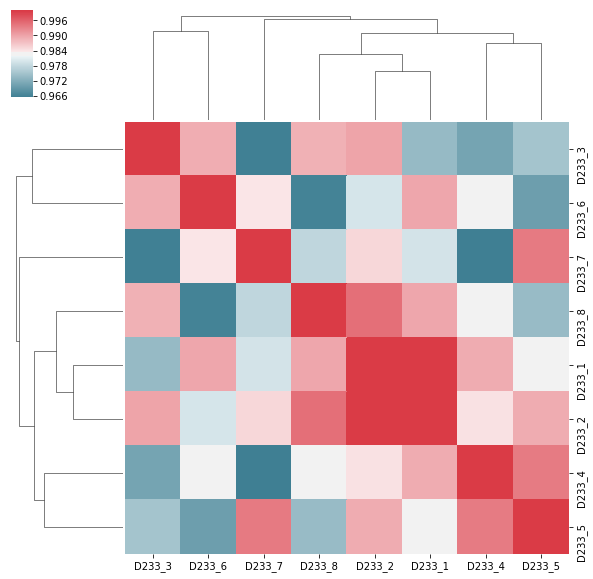

In [34]:
plot_heatmap('jaccard')